# 무게를 찾기
- 목표 : 길이 피쳐를 사용해서 무게 예측
- 데이터 셋 : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight

## [1] 데이터 준비

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
DATA_FILE = '../data/fish.csv'

In [168]:
fish_df = pd.read_csv(DATA_FILE, usecols=[0,1,2] )
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [169]:
fish_df_perch = fish_df[fish_df['Species'] == 'Perch']
fish_df_perch.reset_index(inplace=True, drop=True)

In [170]:
fish_df_perch

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4
5,Perch,100.0,18.0
6,Perch,78.0,18.7
7,Perch,80.0,19.0
8,Perch,85.0,19.6
9,Perch,85.0,20.0


In [171]:
fish_df_perch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  56 non-null     object 
 1   Weight   56 non-null     float64
 2   Length   56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


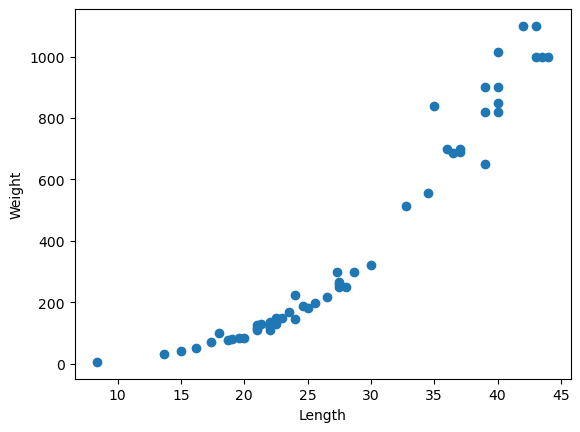

In [172]:
plt.scatter(fish_df_perch['Length'],fish_df_perch['Weight'])
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [173]:
fish_df_perch.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


## [2] 피쳐와 타겟 분리

In [174]:
feature = fish_df_perch[['Length']]
target = fish_df_perch['Weight']

print(f'feature.shape : {feature.shape}, {feature.ndim}D')
print(f'target.shape : {target.shape}, {target.ndim}D')

feature.shape : (56, 1), 2D
target.shape : (56,), 1D


## [3] 훈련/학습 데이터 준비

학습 준비
- 학습 알고리즘 : KNN Regressor
- 피쳐스케일링 

In [175]:
from sklearn.model_selection import train_test_split 

In [176]:
type(feature)

pandas.core.frame.DataFrame

In [177]:
feature.value_counts

<bound method DataFrame.value_counts of     Length
0      8.4
1     13.7
2     15.0
3     16.2
4     17.4
5     18.0
6     18.7
7     19.0
8     19.6
9     20.0
10    21.0
11    21.0
12    21.0
13    21.3
14    22.0
15    22.0
16    22.0
17    22.0
18    22.0
19    22.5
20    22.5
21    22.7
22    23.0
23    23.5
24    24.0
25    24.0
26    24.6
27    25.0
28    25.6
29    26.5
30    27.3
31    27.5
32    27.5
33    27.5
34    28.0
35    28.7
36    30.0
37    32.8
38    34.5
39    35.0
40    36.5
41    36.0
42    37.0
43    37.0
44    39.0
45    39.0
46    39.0
47    40.0
48    40.0
49    40.0
50    40.0
51    42.0
52    43.0
53    43.0
54    43.5
55    44.0>

In [178]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=10) 
# feature는 무조건 2차원 , target은 1차원 

In [179]:
print(f'x_train : {x_train.shape}, {x_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'x_test : {x_test.shape}, {x_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

x_train : (44, 1), 2D
y_train : (44,), 1D
x_test : (12, 1), 2D
y_test : (12,), 1D


In [180]:
# [6] 예측할 때 인덱스가 맞지 않아서 값을 불러올 수 없음 
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### [3-1] 피쳐 스케일링

In [181]:
from sklearn.preprocessing import MinMaxScaler

In [182]:
mm_scaler = MinMaxScaler()

In [183]:
# 스케일러에 데이터셋 전용에 속성값 설정 

mm_scaler.fit(x_train) # scaler를 거치면 데이터프레임에서 ndarray로 변경 

MinMaxScaler()

In [184]:
mm_scaler.min_, mm_scaler.scale_, mm_scaler.data_min_, mm_scaler.data_max_

(array([-0.23595506]), array([0.02808989]), array([8.4]), array([44.]))

In [185]:
# 학습용, 훈련용 데이터셋 스케일링 

x_train_scaled = mm_scaler.transform(x_train)
x_test_scaled = mm_scaler.transform(x_test)

## [4] 훈련/학습

In [186]:
x = [[0],[1],[2],[3]]
y = [0,0,1,1]

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors = 2) # 가까이 있는거 2개만 뽑음 
neigh.fit(x,y)


KNeighborsRegressor(n_neighbors=2)

In [187]:
print(neigh.predict([[1.5]])) 

[0.5]


In [188]:
distance, index = neigh.kneighbors([[1.5]])

print(distance, index)

[[0.5 0.5]] [[1 2]]


1.5를 주면 거리가 가장 가까운 인덱스 1과 2를 찾고 그 가운데 값 (0+1)/2 = 0.5

In [189]:
index = index.reshape(-1)
index

array([1, 2], dtype=int64)

In [190]:
for idx in index.tolist():
    print(idx, y[idx])

1 0
2 1


In [191]:
print(neigh.predict([[3]])) 

[1.]


In [192]:
distance, index = neigh.kneighbors([[3]])

print(distance, index)

[[0. 1.]] [[3 2]]


3을 주면 거리가 가장 가까운 인덱스 3,2를 찾고 그 가운데 값 (1+1)/2 = 1

## [4-1] 학습 진행

In [193]:
# 모듈 로딩 
from sklearn.neighbors import KNeighborsRegressor


In [194]:
model = KNeighborsRegressor()

In [195]:
# 학습용 데이터셋으로 학습 진행 
model.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [196]:
# 모델 파라미터 -> 학습 후 즉, fir() 실행 후 설정되는 매개변수

print(model.n_features_in_) # 피쳐 1개 들어감 
print(model.n_samples_fit_) # 테스트 표본 개수 
print(model.effective_metric_) # 거리 측정 방법 
print(model.effective_metric_params_) # 파라미터 확인 

1
44
euclidean
{}


## [5] 최적의 K 찾기

In [197]:
scores = {}
for k in range(1,model.n_samples_fit_+1): # +1 해줘서 44까지 진행 
    # 최근접 이웃의 갯수 설정 
    # -> 모델 성능 좌우 : 하이퍼파라미터
    model.n_neighbors = k 
    
    # 성능 평가 
    score = model.score(x_test_scaled, y_test)
    scores[k] = score

In [198]:
list(scores.keys())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44]

In [199]:
list(scores.values())

[0.887859218278791,
 0.8926103721490397,
 0.9552977541783533,
 0.9590224642568914,
 0.9586447980338691,
 0.9826358554119554,
 0.9704549233411688,
 0.9607957793936738,
 0.9591849421382691,
 0.9535197509515273,
 0.9556733512563572,
 0.9512260374222055,
 0.9534533403897971,
 0.9533084904073085,
 0.9447418933327212,
 0.9452920717215907,
 0.9390524064380376,
 0.9241894377899799,
 0.9184721955860695,
 0.9214363881547877,
 0.9042481300375664,
 0.9080813651745998,
 0.886318501147965,
 0.8607650729110133,
 0.8481063957296819,
 0.8388523256139375,
 0.820583466132882,
 0.7886490620316149,
 0.7571036071583447,
 0.7176252424348286,
 0.6758976865690555,
 0.6261639376756407,
 0.5786965189532619,
 0.5144710308650999,
 0.45323283959523086,
 0.3669514118521877,
 0.26440075655520656,
 0.18451508628922875,
 0.12632659351245878,
 0.0020560641667453083,
 -0.11535753455574982,
 -0.24752848166781494,
 -0.3694974486498488,
 -0.4595306242691093]

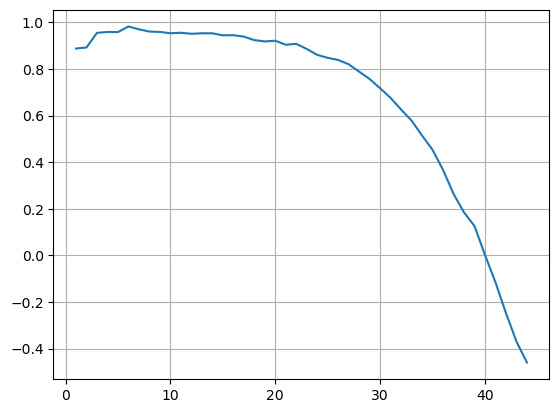

In [200]:
plt.plot(list(scores.keys()), list(scores.values()))
plt.grid()
plt.show()

In [201]:
max(scores.values())

0.9826358554119554

In [202]:
sorted(scores.items(), key = lambda x:x[1], reverse=True) 
# 그냥 정렬하면 key값으로 정렬되므로 
# key와 value를 뽑는 items를 사용해서 lambda에서 x[1]을 사용하여 value로 내림차순 정렬

[(6, 0.9826358554119554),
 (7, 0.9704549233411688),
 (8, 0.9607957793936738),
 (9, 0.9591849421382691),
 (4, 0.9590224642568914),
 (5, 0.9586447980338691),
 (11, 0.9556733512563572),
 (3, 0.9552977541783533),
 (10, 0.9535197509515273),
 (13, 0.9534533403897971),
 (14, 0.9533084904073085),
 (12, 0.9512260374222055),
 (16, 0.9452920717215907),
 (15, 0.9447418933327212),
 (17, 0.9390524064380376),
 (18, 0.9241894377899799),
 (20, 0.9214363881547877),
 (19, 0.9184721955860695),
 (22, 0.9080813651745998),
 (21, 0.9042481300375664),
 (2, 0.8926103721490397),
 (1, 0.887859218278791),
 (23, 0.886318501147965),
 (24, 0.8607650729110133),
 (25, 0.8481063957296819),
 (26, 0.8388523256139375),
 (27, 0.820583466132882),
 (28, 0.7886490620316149),
 (29, 0.7571036071583447),
 (30, 0.7176252424348286),
 (31, 0.6758976865690555),
 (32, 0.6261639376756407),
 (33, 0.5786965189532619),
 (34, 0.5144710308650999),
 (35, 0.45323283959523086),
 (36, 0.3669514118521877),
 (37, 0.26440075655520656),
 (38, 0.184

In [203]:
# 최고 성능의 K값 
best_k = sorted(scores.items(), key = lambda x:x[1], reverse=True) [0][0]
                                             # x = (key, value)
best_k                                             


6

In [204]:
# 모델에 적용 -> n_neighbors에 설정 
model.n_neighbors=best_k

## [6] 새로운 데이터의 무게 예측하기

In [205]:
new_length = input('농어 길이 : ')
print(f'new_length : {new_length}')

new_length : 44


In [206]:
# 2D, 스케일링 적용 

# 2D DataFrame

data_df = pd.DataFrame([new_length], columns=['Length'])
data_df

,Length
0,44


In [207]:
# 피쳐스케일링 
data_scaled = mm_scaler.transform(data_df)
data_scaled

array([[1.]])

In [208]:
# 예측
model.predict(data_scaled)

array([1003.33333333])

In [209]:
distance, index = model.kneighbors(data_scaled)
print(distance, index, sep='\n')

[[0.         0.01404494 0.02808989 0.02808989 0.05617978 0.11235955]]
[[33 29  5 32 17  9]]


In [210]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [216]:
index.reshape(-1)

array([33, 29,  5, 32, 17,  9], dtype=int64)

In [220]:
x_train.iloc[index.reshape(-1)]

,Length
33,44.0
29,43.5
5,43.0
32,43.0
17,42.0
9,40.0


In [221]:
y_train.iloc[index.reshape(-1)]

33    1000.0
29    1000.0
5     1100.0
32    1000.0
17    1100.0
9      820.0
Name: Weight, dtype: float64

In [218]:
y_train[index.reshape(-1)]

33    1000.0
29    1000.0
5     1100.0
32    1000.0
17    1100.0
9      820.0
Name: Weight, dtype: float64

In [217]:
y_train[index.reshape(-1)].sum() / model.n_neighbors

1003.3333333333334

## [7] KNN Regressor 문제점/단점

In [233]:
# 임의의 데이터
new_length = 4

# 2D DataFrame
data_df = pd.DataFrame([new_length], columns = ['Length'])

# 피쳐 스케일링
data_scaled = mm_scaler.transform(data_df)

In [234]:
# 예측 
model.predict(data_scaled)

array([60.98333333])

=> 학습 데이터셋의 범위를 벗어난 더 큰 데이터, 더 작은 데이터의 경우 정확한 예측이 불가능